In [21]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
df = pd.read_excel('/content/drive/MyDrive/data_science/dataset/dataset2.xlsx')
df.head()

,DATE,SEA,WIND,STEAM TIME,OBS MILES,AVE SPD,STEAM TIME.1,OBS MILES.1,AVE SPD.1,DIST TO GO,DIST RUN,LOG SPD,DIST RUN.1,LOG SPD.1,MFO
0,2020-01-01,3,4,0,0,0.000000,0,0,0.000000,1341,0,0.000000,0,0.000000,0.00
1,2020-01-02,2,3,16,234,14.625000,16,234,14.625000,1107,230,14.375000,230,14.375000,1.75
2,2020-01-03,3,4,24,349,14.541667,40,583,14.575000,758,348,14.500000,578,14.450000,2.95
3,2020-01-04,3,4,23,317,13.782609,63,900,14.285714,441,325,14.130435,903,14.333333,2.95
4,2020-01-05,2,3,24,321,13.375000,87,1221,14.034483,120,326,13.583333,1229,14.126437,2.95


In [24]:
df.describe()

,SEA,WIND,STEAM TIME,OBS MILES,AVE SPD,STEAM TIME.1,OBS MILES.1,AVE SPD.1,DIST TO GO,DIST RUN,LOG SPD,DIST RUN.1,LOG SPD.1,MFO
count,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000
mean,2.631579,3.368421,18.842105,235.526316,10.405286,63.473684,842.578947,11.306387,744.631579,219.894737,9.541582,827.578947,11.179354,2.031053
std,0.597265,0.597265,8.738568,125.841332,5.261003,48.627117,640.485260,5.084467,645.130840,144.100619,6.151439,618.975526,5.069814,0.966919
min,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,3.000000,18.000000,161.000000,8.315789,23.000000,309.000000,12.529762,161.000000,60.500000,2.880952,309.500000,12.213190,1.850000
50%,3.000000,3.000000,24.000000,317.000000,13.416667,63.000000,885.000000,13.458333,693.000000,321.000000,13.416667,884.000000,13.500000,2.450000
75%,3.000000,4.000000,24.000000,324.000000,13.562500,91.500000,1258.000000,13.503472,1142.500000,325.000000,13.562500,1263.500000,13.604167,2.450000
max,4.000000,4.000000,24.000000,349.000000,14.625000,163.000000,2147.000000,14.625000,2147.000000,348.000000,14.500000,1944.000000,14.450000,2.950000


In [25]:
df.isna().sum()

DATE            0
SEA             0
WIND            0
STEAM TIME      0
OBS MILES       0
AVE SPD         0
STEAM TIME.1    0
OBS MILES.1     0
AVE SPD.1       0
DIST TO GO      0
DIST RUN        0
LOG SPD         0
DIST RUN.1      0
LOG SPD.1       0
MFO             0
dtype: int64

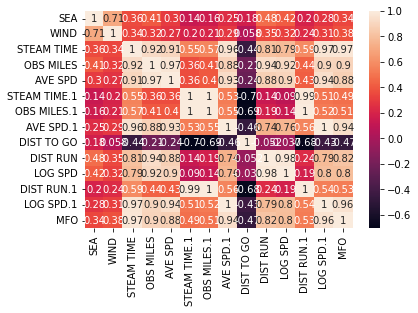

In [26]:
# Melihat korelasi antar fitur
df_corr = df.corr()
sns.heatmap(df_corr, annot = True)

In [28]:
df_corr['MFO'].sort_values(ascending = False)

MFO             1.000000
STEAM TIME      0.974373
LOG SPD.1       0.955508
AVE SPD.1       0.943930
OBS MILES       0.895105
AVE SPD         0.879047
DIST RUN        0.821235
LOG SPD         0.800166
DIST RUN.1      0.532414
OBS MILES.1     0.505336
STEAM TIME.1    0.486003
WIND            0.378315
SEA             0.344139
DIST TO GO     -0.465006
Name: MFO, dtype: float64

In [32]:
column_sets = ['SEA', 'WIND', 'STEAM TIME', 'OBS MILES', 'AVE SPD', 'STEAM TIME.1', 'OBS MILES.1', 'AVE SPD.1', 'DIST RUN', 'LOG SPD', 'DIST RUN.1', 'LOG SPD.1']
#x = df.drop(columns='HARGA', axis=1)
X = df[['SEA', 'WIND', 'STEAM TIME', 'OBS MILES', 'AVE SPD', 'STEAM TIME.1', 'OBS MILES.1', 'AVE SPD.1', 'DIST RUN', 'LOG SPD', 'DIST RUN.1', 'LOG SPD.1']]
y = df['MFO']

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 720x576 with 0 Axes>

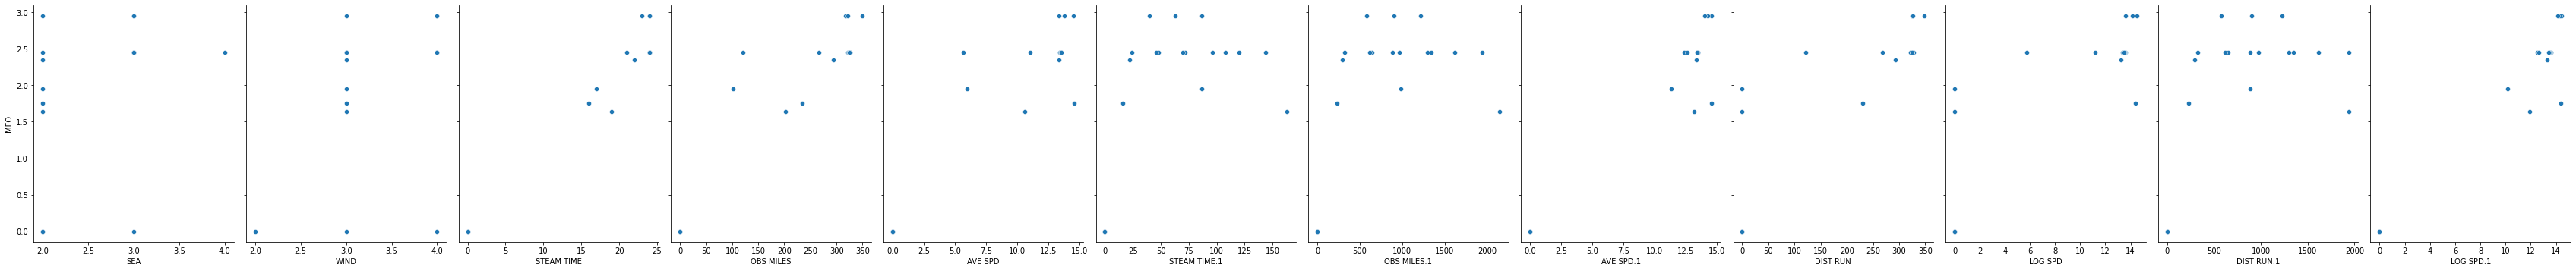

In [38]:
#Bivariate analysis antara independent variable dan dependent variable.

plt.figure(figsize=(10,8))
sns.pairplot(data=df, x_vars=['SEA', 'WIND', 'STEAM TIME', 'OBS MILES', 'AVE SPD', 'STEAM TIME.1', 'OBS MILES.1', 'AVE SPD.1', 'DIST RUN', 'LOG SPD', 'DIST RUN.1', 'LOG SPD.1'], y_vars=['MFO'], size=5, aspect=0.80)

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [35]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train) # Training step

LinearRegression()

In [36]:
#Keempat, train the model menggunakan training data yang sudah displit.
model_lr.fit(X_train, y_train)
y_pred = model_lr.predict(X_test)

In [37]:
# Model prediction on train data
y_pred = model_lr.predict(X_train)
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.9997489094753061
Adjusted R^2: 0.998242366327143
MAE: 0.011608741063295699
MSE: 0.00025347019329319465
RMSE: 0.01592074725925874


In [41]:
#Prediksi harga rumah idaman Joko.
model_lr.predict([['3', '4', '24', '322', '13.42', '49', '646', '13.18', '325', '13.54', '327', '13.08']])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


array([2.51470631])

In [42]:
# Import Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor
reg = RandomForestRegressor()

# Train the model using the training sets 
reg.fit(X_train, y_train)

RandomForestRegressor()

In [43]:
# Model prediction on train data
y_pred_rfg = reg.predict(X_train)

In [44]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred_rfg))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred_rfg))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred_rfg))
print('MSE:',metrics.mean_squared_error(y_train, y_pred_rfg))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred_rfg)))

R^2: 0.9918311198666504
Adjusted R^2: 0.9428178390665528
MAE: 0.05858000000000026
MSE: 0.008246299333333356
RMSE: 0.09080913683838954


In [45]:
# Import XGBoost Regressor
from xgboost import XGBRegressor

#Create a XGBoost Regressor
xbreg = XGBRegressor()

# Train the model using the training sets 
xbreg.fit(X_train, y_train)

[07:30:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [46]:
# Model prediction on train data
y_pred_xg = xbreg.predict(X_train)

In [47]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred_xg))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred_xg))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred_xg))
print('MSE:',metrics.mean_squared_error(y_train, y_pred_xg))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred_xg)))

R^2: 0.9999989089095263
Adjusted R^2: 0.9999923623666838
MAE: 0.0007009027798971464
MSE: 1.1014311019196487e-06
RMSE: 0.0010494908774828149
